# Определение потенциально продаваемых видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеются данные до 2016 года. Нужно отработать принцип работы с данными для прогноза на будущий год, вне зависимости от того, какой год сейчас.

В качестве исходных данных получена таблица с информацией о видео играх, их продажах по миру, оценках от критиков и пользоваетелей, возрастном рейтинге

<b>Описание полей: </b>
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
*  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


<b> Данное исследование разделено на несколько частей.

<b> Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#ch_1_1)

<b> Часть 2. Предобработка данных:
    
* [1. Замена названий столбцов.](#ch_2_1)    
* [2. Приведение данных к нужным типам.](#ch_2_2)
* [3. Нахождение и ликвидация ошибок и пропусков в данных.](#ch_2_3)
* [4. Расчет и добавление данных в датафрейм.](#ch_2_4)    

<b> Часть 3. Проведение анализа датафрейма:
* [1. Рассмотрение частоты выпуска игр в зависимости от года.](#ch_3_1)
* [2. Анализ динамики продаж по платформам.](#ch_3_2)
* [3. Определение актуального периода для последующего анализа.](#ch_3_3)
* [4. Сравнение продаж в зависимости от платформы.](#ch_3_4)
* [5. Рассмотрение продаж по платформам на графиках.](#ch_3_5)
* [6. Анализ влияния отзывов на продажи.](#ch_3_6)
* [7. Сравнение продаж в зависимости от жанра.](#ch_3_7)

<b> Часть 4. Создание портрета пользователя:
* [1. Выявление топ-5 платформ по регионам.](#ch_4_1)
* [2. Выявление топ-5 жанров по регионам.](#ch_4_2)
* [2. Выявление влияния возрастного рейтинга на продажи в регионе.](#ch_4_3)    
    
<b> Часть 5. Проверка статистических гипотез:
* [1. Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC.](#ch_5_1)
* [2. Гипотеза об отличии средних пользовательских рейтингов жанров Action и Sports.](#ch_5_2)

<b> Часть 6. Выводы:
* [1. Выводы.](#ch_6_1)

## Открытие файлов с данными и изучение общей информации <a id='ch_1_1'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/games.csv')

print(df.info())
#display(df.head(10))
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<b> Выводы </b>
<br>
В датафрейме есть несколько столбцов с большим количеством пропущенных данных, это настораживает. Решим, что делать с такими данными в следующем блоке.

## Предобработка данных 

### Замена названий столбцов (приведение к нижнему регистру) <a id='ch_2_1'></a>

In [2]:
df.columns = map(str.lower, df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Радует Python своей лакончиностью!

### Приведение данных к нужным типам <a id='ch_2_2'></a>

In [3]:
df['year_of_release'] = df['year_of_release'].astype('Int16')
df['critic_score'] = df['critic_score'].astype('Int8')
print('na_sales max len: ', df['na_sales'].astype(str).str.len().max())
print('eu_sales max len: ',df['eu_sales'].astype(str).str.len().max())
print('jp_sales max len: ',df['jp_sales'].astype(str).str.len().max())
print('other_sales max len: ',df['other_sales'].astype(str).str.len().max())

na_sales max len:  5
eu_sales max len:  5
jp_sales max len:  5
other_sales max len:  5


Приведем поле с годом выпуска и оценкой критиков к целочисленному типу.

Конечно, есть соблазн перевести продажи в миллионах в штуки, и затем в целочисленный тип, но в текущем виде они выглядят компактно, да и знаков после запятой точно не больше 3. Максимальная длина строк всех элементов колонок с продажами не более 5, учитывая точку. Решено оставить их в исходном виде.

### Нахождение и ликвидация ошибок и пропусков в данных <a id='ch_2_3'></a>

In [4]:
df = df.dropna(subset = ['name'],inplace = False)
df = df.dropna(subset = ['year_of_release'],inplace = False)
df['user_score'] = df['user_score'].replace('tbd', np.nan )
df['user_score'] = df['user_score'].astype('Float64')
df['rating'] = df['rating'].fillna('undefined')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int16
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int8
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: Int16(1), Int8(1), float64(5), object(4)
memory usage: 1.3+ MB


Удалены строки с пустыми названиями игр, а также с пропущенными годами выпуска. Значения tbd в колонке user_score заменим на пустые значения, ибо аббревиатура значит to be determined - рейтинг еще не выставлен. Смысловой нагрузки это не несет. Заодно приведем колонку к типу float.

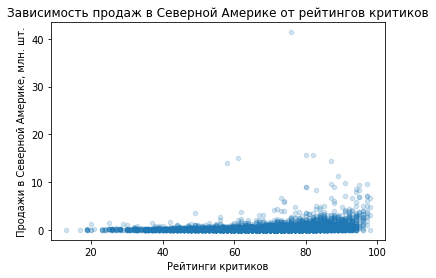

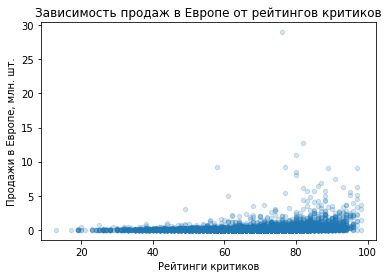

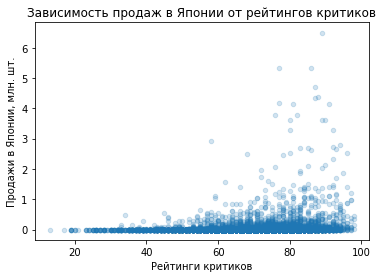

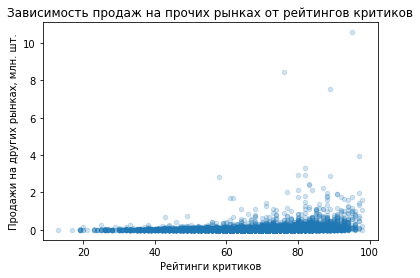

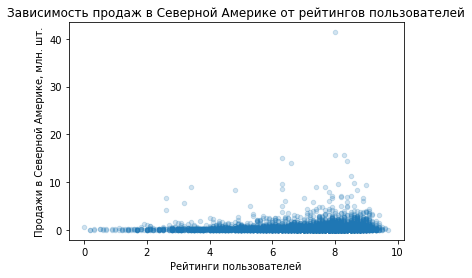

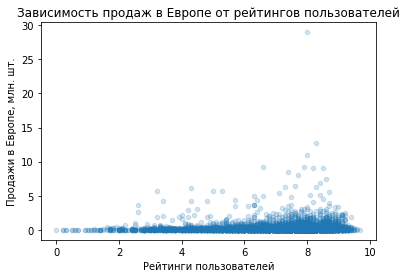

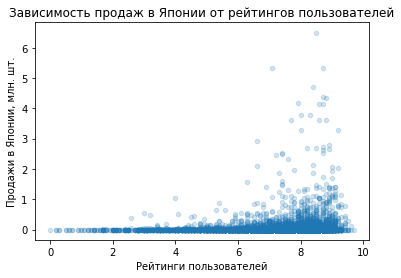

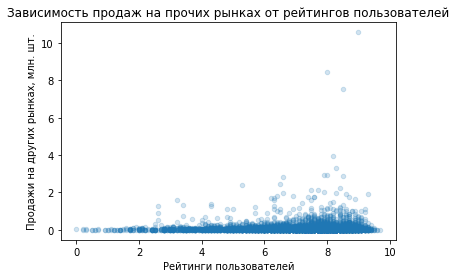

In [5]:
scatter1 = df.plot(x='critic_score', y='na_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж в Северной Америке от рейтингов критиков')
scatter1.set(xlabel="Рейтинги критиков", ylabel="Продажи в Северной Америке, млн. шт.")
scatter2 = df.plot(x='critic_score', y='eu_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж в Европе от рейтингов критиков')
scatter2.set(xlabel="Рейтинги критиков", ylabel="Продажи в Европе, млн. шт.")
scatter3 = df.plot(x='critic_score', y='jp_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж в Японии от рейтингов критиков')
scatter3.set(xlabel="Рейтинги критиков", ylabel="Продажи в Японии, млн. шт.")
scatter4 = df.plot(x='critic_score', y='other_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж на прочих рынках от рейтингов критиков')
scatter4.set(xlabel="Рейтинги критиков", ylabel="Продажи на других рынках, млн. шт.")
scatter5 = df.plot(x='user_score', y='na_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж в Северной Америке от рейтингов пользователей')
scatter5.set(xlabel="Рейтинги пользователей", ylabel="Продажи в Северной Америке, млн. шт.")
scatter6 = df.plot(x='user_score', y='eu_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж в Европе от рейтингов пользователей')
scatter6.set(xlabel="Рейтинги пользователей", ylabel="Продажи в Европе, млн. шт.")
scatter7 = df.plot(x='user_score', y='jp_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж в Японии от рейтингов пользователей')
scatter7.set(xlabel="Рейтинги пользователей", ylabel="Продажи в Японии, млн. шт.")
scatter8 = df.plot(x='user_score', y='other_sales', kind='scatter', alpha = 0.2,\
        title = 'Зависимость продаж на прочих рынках от рейтингов пользователей')
scatter8.set(xlabel="Рейтинги пользователей", ylabel="Продажи на других рынках, млн. шт.")

plt.show()

Пропущенные данные в колонках critic_score, user_score, rating довольно рискованно заполнять какими-либо значениями, ибо явной связи между рейтингами и другими параметрами нет. Хоть и с увеличением рейтингов наблюдается рост выдач, он довольно незначительный от общего количества, т.е. даже при высоких рейтингах критиков и игроков игры в большинстве своем продаются так же, как и игры с низким рейтингом.

### Расчет и добавление данных в датафрейм <a id='ch_2_4'></a>

In [6]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


  Данные с общими продажами добавлены.

## Проведение анализа датафрейма

### Рассмотрение частоты выпуска игр в зависимости от года <a id='ch_3_1'></a>

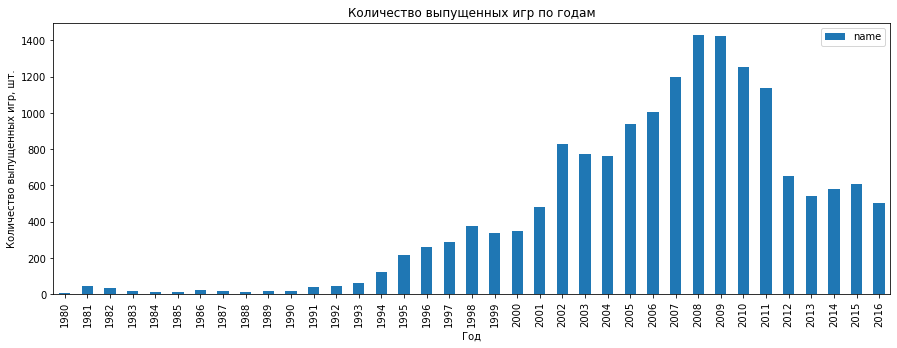

In [7]:
bar1 = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').\
    plot(kind = 'bar', y = 'name', figsize = (15, 5), title = 'Количество выпущенных игр по годам')
bar1.set(xlabel="Год", ylabel="Количество выпущенных игр, шт.")
plt.show()

Наблюдается впечатляющий прирост количества выпущенных игр в период с 2000 по 2009 год. После 2009 выпуск пошел на спад. Количество игр, выпущенных с 1980 по 1993, составляет не более 50 в год.

### Анализ динамики продаж по платформам <a id='ch_3_2'></a>

In [8]:
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
    sort_values(by = 'total_sales', ascending = False). head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


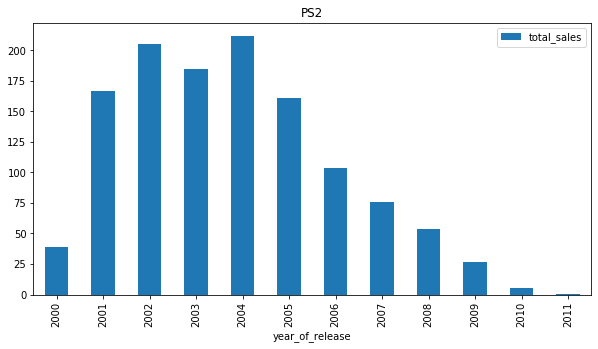

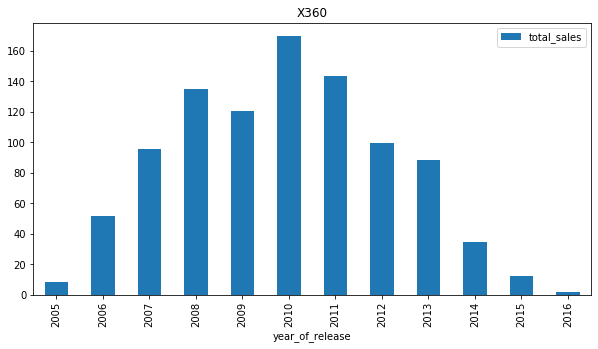

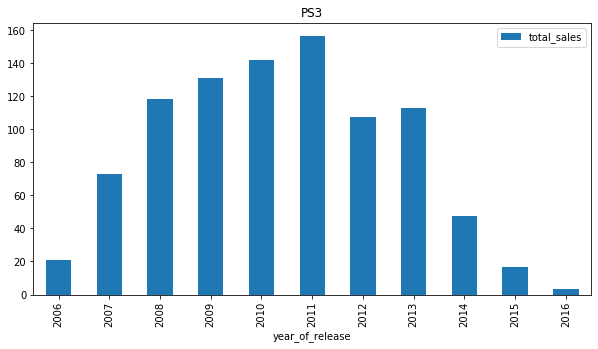

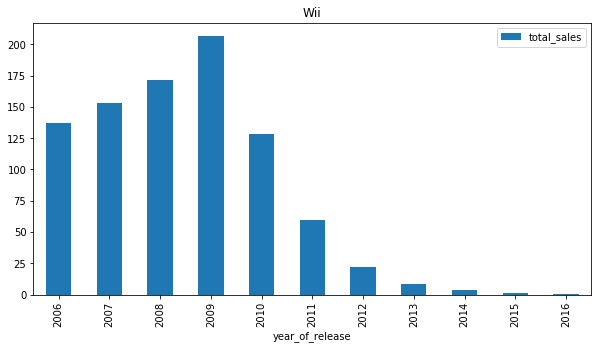

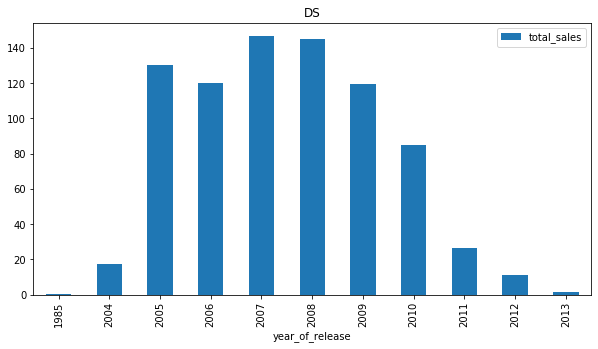

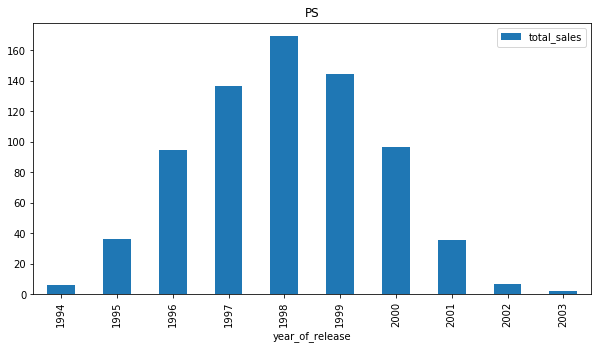

In [9]:
df.query('platform == "PS2"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'PS2')

df.query('platform == "X360"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'X360')

df.query('platform == "PS3"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'PS3')

df.query('platform == "Wii"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'Wii')

df.query('platform == "DS"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'DS')

df.query('platform == "PS"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'PS')
plt.show()

Из топовых по количеству продаж игр много платформ вышли на рынок в 2005-2006 году. В среднем одно поколение платформы актуально в течение 5-7 лет.

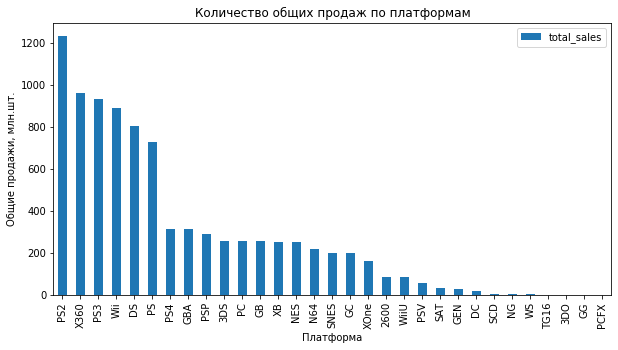

In [12]:
plt_by_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
    sort_values(by = 'total_sales', ascending = False)
bar2 = plt_by_sales.plot(kind = 'bar', y = 'total_sales', figsize = (10, 5), title = 'Количество общих продаж по платформам')
bar2.set(xlabel="Платформа", ylabel="Общие продажи, млн.шт.")
plt.show()

### Определение актуального периода для последующего анализа <a id='ch_3_3'></a>

In [13]:
df = df.query('year_of_release >= 2013')

Учитывая, что в семилетний период входит рост и падение продаж одного поколения большинства платформ платформ, возьмем этот период как актуальный.

### Сравнение продаж в зависимости от платформы <a id='ch_3_4'></a>

In [14]:
df.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum', margins = True)

year_of_release,2013,2014,2015,2016,All
platform,,,,,
3DS,56.57,43.76,27.78,15.14,143.25
DS,1.54,NaN,NaN,NaN,1.54
PC,12.38,13.28,8.52,5.25,39.43
PS3,113.25,47.76,16.82,3.60,181.43
PS4,25.99,100.00,118.90,69.25,314.14
PSP,3.14,0.24,0.12,NaN,3.50
PSV,10.59,11.90,6.25,4.25,32.99
Wii,8.59,3.75,1.14,0.18,13.66
WiiU,21.65,22.03,16.35,4.60,64.63


По продажам лидируют платформы PS3, X360, PS4, 3DS, XOne. Из них только PS4, XOne показывают уверенную положительную динамику. 
Стоит также обратить внимание на 3DS, в 2017 году по ней всё еще могут быть неплохие показатели продаж, несмотря на медленный спад.

### Рассмотрение продаж по платформам на графиках <a id='ch_3_5'></a>

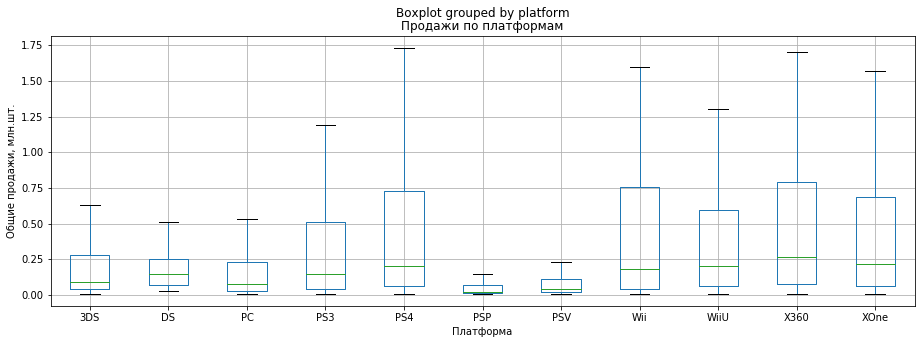

In [15]:
#df.plot(kind= 'box', y = 'total_sales', x = 'platform' )
boxplot1 = df.boxplot(column = 'total_sales', by = 'platform', figsize = (15,5), showfliers = False)
boxplot1.set(xlabel="Платформа", ylabel="Общие продажи, млн.шт.", title  = 'Продажи по платформам')
plt.show()

В целом, данные довольно сильно разбросаны. Выбросов, судя по графикам, много, и отстоят они от усов значительно. При этом данные по третий квартиль у всех платформ плотно собраны. Выбросы здесь - не повод задумываться об очистке данных. Тут ошибка выжившего на лицо - малое кол-во тайтлов оказывается на слуху и продается в десятки-сотни раз лучше большинства.

### Анализ влияния отзывов на продажи <a id='ch_3_6'></a>

Рассмотрим зависимость для самой популярной платформы за выбранный период - PS3.

Коэффициент корреляции между оценками пользователей и  продажами: 0.0023944027357566925
Коэффициент корреляции между оценками критиков и  продажами: 0.3342853393371919


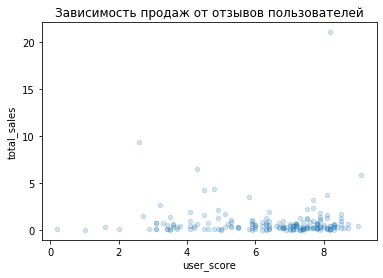

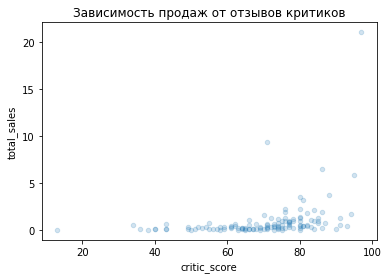

In [16]:
ps3 = df.query('platform == "PS3"')
ps3['critic_score'] = ps3['critic_score'].astype('Float64') #почему-то для Int корреляция не считалась
print('Коэффициент корреляции между оценками пользователей и  продажами:', ps3['user_score'].corr(ps3['total_sales']))
print('Коэффициент корреляции между оценками критиков и  продажами:', ps3['critic_score'].corr(ps3['total_sales']))
ps3.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов пользователей')
ps3.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов критиков')
plt.show()

Видно, что между продажами и отзывами критиков существует небольшая прямая зависимость. На графике также наблюдается легкий рост продаж основной массы тайтлов с повышением рейтинга критиков. Связи между отзывами пользователей и продажами почти нет. На графике это также подтверждается: основная масса продаж собрана возле нуля вне зависимости от рейтинга пользователей.

Проверим аналогично для еще четырех популярных платформ: PS4, X360, 3DS, Wii 

Коэффициент корреляции между оценками пользователей и  продажами, PS4 : 0.0023944027357566925
Коэффициент корреляции между оценками критиков и  продажами, PS4: 0.3342853393371919
Коэффициент корреляции между оценками пользователей и  продажами, X360: -0.011742185147181342
Коэффициент корреляции между оценками критиков и  продажами, X360: 0.3503445460228664
Коэффициент корреляции между оценками пользователей и  продажами, 3DS: 0.24150411773563016
Коэффициент корреляции между оценками критиков и  продажами, 3DS: 0.3570566142288103
Коэффициент корреляции между оценками пользователей и  продажами, Wii: 0.6829417215362368
Коэффициент корреляции между оценками критиков и  продажами, Wii: nan


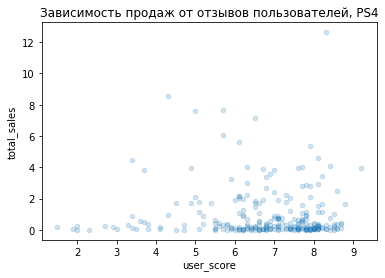

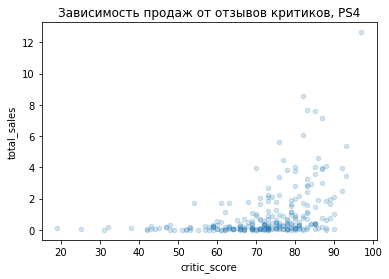

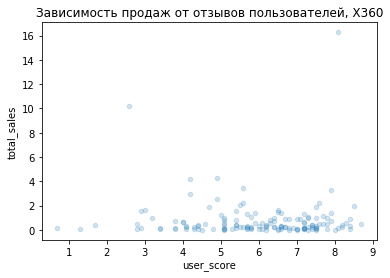

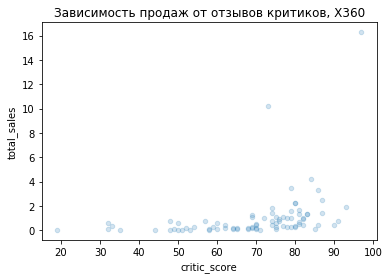

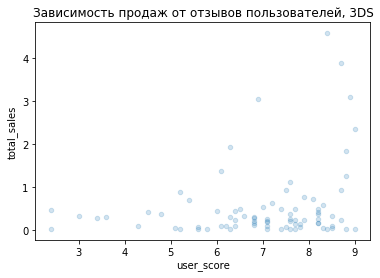

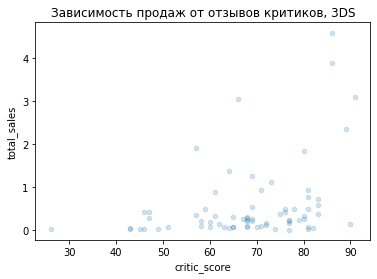

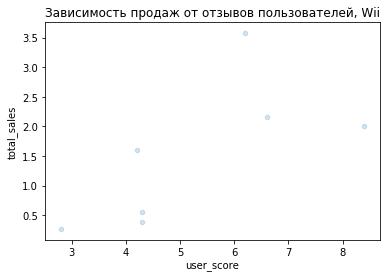

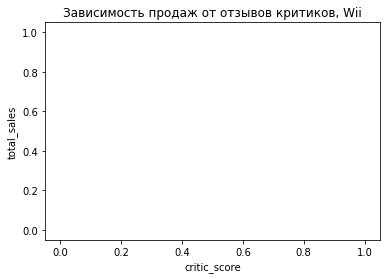

In [17]:
ps4 = df.query('platform == "PS4"')
x360 = df.query('platform == "X360"')
query_3DS = df.query('platform == "3DS"')
Wii = df.query('platform == "Wii"')

ps4['critic_score'] = ps4['critic_score'].astype('Float64')
x360['critic_score'] =x360['critic_score'].astype('Float64')
query_3DS['critic_score'] = query_3DS['critic_score'].astype('Float64')
Wii['critic_score'] = Wii['critic_score'].astype('Float64')

print('Коэффициент корреляции между оценками пользователей и  продажами, PS4 :', ps3['user_score'].corr(ps3['total_sales']))
print('Коэффициент корреляции между оценками критиков и  продажами, PS4:', ps3['critic_score'].corr(ps3['total_sales']))
print('Коэффициент корреляции между оценками пользователей и  продажами, X360:', x360['user_score'].corr(x360['total_sales']))
print('Коэффициент корреляции между оценками критиков и  продажами, X360:', x360['critic_score'].corr(x360['total_sales']))
print('Коэффициент корреляции между оценками пользователей и  продажами, 3DS:', query_3DS['user_score'].corr(query_3DS['total_sales']))
print('Коэффициент корреляции между оценками критиков и  продажами, 3DS:', query_3DS['critic_score'].corr(query_3DS['total_sales']))
print('Коэффициент корреляции между оценками пользователей и  продажами, Wii:', Wii['user_score'].corr(Wii['total_sales']))
print('Коэффициент корреляции между оценками критиков и  продажами, Wii:', Wii['critic_score'].corr(Wii['total_sales']))



ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов пользователей, PS4')
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов критиков, PS4')
x360.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов пользователей, X360')
x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов критиков, X360')
query_3DS.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов пользователей, 3DS')
query_3DS.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов критиков, 3DS')
Wii.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов пользователей, Wii')
Wii.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.2,\
                                   title = 'Зависимость продаж от отзывов критиков, Wii')
plt.show()

В целом картина для всех платформ похожа на PS3: связь между ростом рейтинга и ростом продаж прямая, но слабая. На диаграммах рассеяния это также подтверждается - ярко выраженного роста основной массы тайтлов с ростом рейтинга не наблюдается. Интересна разница в значении коэффициента корреляции между рейтингами пользователей и продажами: для PS4 и X360 они на уровне 0.065 , для Wii и 3DS уже в 2-3 раза выше - 0.148 и 0.222 соответсвенно. Но даже такая разница не оказывает большого влияния на тесноту связи переменных, ибо даже 0.222 - очень низкое значение, показывающее, что связь между переменными слаба.

### Сравнение продаж в зависимости от жанра <a id='ch_3_7'></a>

In [18]:
df.pivot_table(index = 'genre', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum', margins = True)

year_of_release,2013,2014,2015,2016,All
genre,,,,,
Action,122.51,97.23,72.02,30.11,321.87
Adventure,6.09,5.57,8.16,3.82,23.64
Fighting,7.09,15.85,7.90,4.47,35.31
Misc,25.27,23.38,11.57,2.60,62.82
Platform,24.54,8.81,6.05,3.23,42.63
Puzzle,0.96,1.49,0.71,0.01,3.17
Racing,12.37,16.66,8.07,2.79,39.89
Role-Playing,44.45,45.62,37.64,18.18,145.89
Shooter,62.04,65.21,67.51,38.22,232.98


Самые продаваемые жанры - экшн, шутеры, РПГ, спортивные игры. Популярность их с годами остаётся на примерно одном уровне. Хуже всего в плане продаж показали себя жанры паззлов, стратегий, приключенческие игры, симуляторы. Интересно наблюдать, как упали продажи стратегий и паззлов - в 5-10 раз в период с 2010 по 2015.

## Создание портрета пользователя

### Выявление топ-5 платформ по регионам <a id='ch_4_1'></a>

In [19]:
na_platforms = df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').\
    sort_values(by = 'na_sales', ascending = False)
na_platforms['Share,%'] = (na_platforms['na_sales']/na_platforms['na_sales'].sum()).round(4)*100

eu_platforms = df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').\
    sort_values(by = 'eu_sales', ascending = False)
eu_platforms['Share,%'] = (eu_platforms['eu_sales']/eu_platforms['eu_sales'].sum()).round(4)*100

jp_platforms = df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').\
    sort_values(by = 'jp_sales', ascending = False)
jp_platforms['Share,%'] = (jp_platforms['jp_sales']/jp_platforms['jp_sales'].sum()).round(4)*100

print('North america: \n',na_platforms.head(5), '\n Europe: \n' ,eu_platforms.head(5), '\n Japan: \n', jp_platforms.head(5))
#df.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc = 'sum').\
 #   sort_values(by = 'total_sales', ascending = False). head(10)

North america: 
           na_sales  Share,%
platform                   
PS4         108.74    24.84
XOne         93.12    21.27
X360         81.66    18.66
PS3          63.50    14.51
3DS          38.20     8.73 
 Europe: 
           eu_sales  Share,%
platform                   
PS4         141.09    35.97
PS3          67.81    17.29
XOne         51.59    13.15
X360         42.52    10.84
3DS          30.96     7.89 
 Japan: 
           jp_sales  Share,%
platform                   
3DS          67.81    48.17
PS3          23.35    16.59
PSV          18.59    13.21
PS4          15.96    11.34
WiiU         10.88     7.73


Сразу бросается в глаза, насколько Япония выделяется в плане потребительских предпочтений. Если в Северной Америке и Европе топ-5 платформ почти полностью пересекаются (в Европе есть PC, но нет Xone), то в Японии в топ-5 4 самобытных платформы. И только PS3 объединяет все три рынка. Игры на неё лучше всего продаются в Европе, в Северной Америке и Японии приставка идёт на втором месте. X360 лидирует в Северной Америке с большим отрывом в 9% общего числа продаж, но в Европе отстаёт от PS3 на 6%. Интересно, что доля продаж PS4 в Европе почти в 2 раза выше, чем в Северной Америке: 16.77% против 9.62% 

<b> Новые выводы: </b>

Сразу бросается в глаза, насколько Япония выделяется в плане потребительских предпочтений. Если в Северной Америке и Европе топ-5 платформ полностью пересекаются, то в Японии в топ-5 есть PSV и WiiU. Наболее популярна в Северной Америке и Европе PS4. В Европе её доля продаж почти 36%, в Сев. Америке - почти четверть общих. XOne идёт позади - 21% в Сев.Америки и всего лишь 13% в Европе. Потребители всё еще покупают приставки прошлого поколения. Так, в Сев. Америке X360 и PS3 идут на 3 и 4 месте топа соответственно, суммарно занимая 33% рынка. В Европе они идут на 2 и 4 месте соответственно, суммарно занимая около 28% рынка. 3DS расположилась на 5 месте топа в Европе и Сев. Америке, занимая 7.89% и 8.73% соответственно. Зато в Японии эта приставка крайне популярна - впечатляющие 48% рынка! За ней в Японии идут PS3 (16.59%), PSV(13.21%), PS4(11.34%), WiiU(7.73%)


### Выявление топ-5 жанров по регионам <a id='ch_4_2'></a>

In [20]:
na_genres = df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').\
    sort_values(by = 'na_sales', ascending = False)
na_genres['Share,%'] = (na_genres['na_sales']/na_genres['na_sales'].sum()).round(4)*100

eu_genres = df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').\
    sort_values(by = 'eu_sales', ascending = False)
eu_genres['Share,%'] = (eu_genres['eu_sales']/eu_genres['eu_sales'].sum()).round(4)*100

jp_genres = df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').\
    sort_values(by = 'jp_sales', ascending = False)
jp_genres['Share,%'] = (jp_genres['jp_sales']/jp_genres['jp_sales'].sum()).round(4)*100

print('North america: \n',na_genres.head(5), '\n Europe: \n' ,eu_genres.head(5), '\n Japan: \n', jp_genres.head(5))

North america: 
               na_sales  Share,%
genre                          
Action          126.05    28.80
Shooter         109.74    25.07
Sports           65.27    14.91
Role-Playing     46.40    10.60
Misc             27.49     6.28 
 Europe: 
               eu_sales  Share,%
genre                          
Action          118.13    30.12
Shooter          87.86    22.40
Sports           60.52    15.43
Role-Playing     36.97     9.43
Racing           20.19     5.15 
 Japan: 
               jp_sales  Share,%
genre                          
Role-Playing     51.04    36.26
Action           40.49    28.76
Misc              9.20     6.54
Fighting          7.65     5.43
Shooter           6.61     4.70


И по этому признаку Японский рынок выделяется. Если в Северной Америке и Европе тройка лидеров идентична (Action, Shooter, Sports), и доли их очень схожи, то в Японии на первом месте расположились РПГ с более чем 1/3 доли всех продаж. Всего два жанра в Японии отвечают за более чем 60% продаж: RPG, Action. RPG менее популярны в Европе и Северной Америке: доля продаж 9.43% и 10.6% соответственно. Жанр Гонки в Европе занимает 5 место по продажам с долей 5.15%. Жанр Прочее в Северной Америке занимает 5 место с долей 6.28%, в Японии 3 место с долей 6.54%

### Выявление влияния возрастного рейтинга на продажи в регионе <a id='ch_4_3'></a>

In [21]:
na_ratings = df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').\
    sort_values(by = 'na_sales', ascending = False)
na_ratings['Share,%'] = (na_ratings['na_sales']/na_ratings['na_sales'].sum()).round(4)*100

eu_ratings = df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').\
    sort_values(by = 'eu_sales', ascending = False)
eu_ratings['Share,%'] = (eu_ratings['eu_sales']/eu_ratings['eu_sales'].sum()).round(4)*100

jp_ratings = df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').\
    sort_values(by = 'jp_sales', ascending = False)
jp_ratings['Share,%'] = (jp_ratings['jp_sales']/jp_ratings['jp_sales'].sum()).round(4)*100

print('North america: \n',na_ratings, '\n Europe: \n' ,eu_ratings, '\n Japan: \n', jp_ratings)

North america: 
            na_sales  Share,%
rating                      
M            165.21    37.74
undefined     89.42    20.43
E             79.05    18.06
E10+          54.24    12.39
T             49.79    11.38 
 Europe: 
            eu_sales  Share,%
rating                      
M            145.32    37.05
E             83.36    21.25
undefined     78.91    20.12
E10+          42.69    10.88
T             41.95    10.70 
 Japan: 
            jp_sales  Share,%
rating                      
undefined     85.05    60.41
T             20.59    14.63
E             15.14    10.75
M             14.11    10.02
E10+           5.89     4.18


В Европе и Северной Америке доли продаж по рейтингам примерно равны: около 40% для Mature, 28% для Everyone, 16% для Teen, 14-16% для Everyone10+. В Японии ситуация сильно отличается - доля игр с рейтингом Mature почти в два раза ниже - 22.78%, Everyone - 35.82%, Teen - 31.51%. На рейтинг Everyone 10+ в Японии приходится 9.89% продаж. Игр с контентом не для детей в Японии продается значительно меньше.

<b> Новые выводы: </b>

В Европе и Северной Америке доли продаж по рейтингам довольно похожи: около 37% для Mature и там, и там, 20% проданных игр пока без рейтинга, 18-21% для Everyone ,10-11 % для Teen, 10-12% для Everyone10+.
В Японии же большинство проданных игр оказалось пока без рейтинга - более 60%!. 14.63% продаж приходится на Teen, 10.75% - на Everyone, 4.18% - на Everyone10+. И только 10.02% на Mature.

Игры с контентом не для детей в Северной Америке и Европе занимают в 3.7 раз большую долю рынка, чем в Японии.

   ## Проверка статистических гипотез

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC <a id='ch_5_1'></a>

In [22]:
xone_hypo = df.query('platform == "XOne"')['user_score'].dropna()
pc_hypo = df.query('platform == "PC"')['user_score'].dropna()
print('Дисперсия для Xone -', xone_hypo.var())
print('Дисперсия для PC -',pc_hypo.var())
alpha = 0.05
results = st.ttest_ind(xone_hypo, pc_hypo, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия для Xone - 1.9069968429360695
Дисперсия для PC - 3.035892752408882
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза сформирована как "Cредние пользовательские рейтинги платформ Xbox One и PC равны".
Альтернативная гипотеза - "Cредние пользовательские рейтинги платформ Xbox One и PC не равны".

Есть возможность рассмотреть весь датасет для каждой из платформ, поэтому уместно применять метод для проверки гипотез двух генеральных совокупностей. Среди параметров нужно указать equal_var = False, т.к. в зависимости от платформ дисперсии совокупностей отличаются.

По результатам теста нулевую гипотезу отвергнуть нельзя. С вероятностью в 98% такое или бОльшее различие средних рейтингов можно получить случайно. Проверим реальные значения средних рейтингов для платформ.

In [23]:
print('Средний рейтинг для XOne:',xone_hypo.mean())
print('Средний рейтинг для PC:',pc_hypo.mean())

Средний рейтинг для XOne: 6.521428571428572
Средний рейтинг для PC: 6.2696774193548395


Действительно, различие в рейтингах минимальное, всего лишь около 0.26!

### Гипотеза об отличии средних пользовательских рейтингов жанров Action и Sports <a id='ch_5_2'></a>

In [24]:
action_hypo = df.query('genre == "Action"')['user_score'].dropna()
sports_hypo = df.query('genre == "Sports"')['user_score'].dropna()

print('Дисперсия для Action -', action_hypo.var())
print('Дисперсия для Sports -',sports_hypo.var())

alpha = 0.05
results = st.ttest_ind(action_hypo, sports_hypo, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия для Action - 1.7693609042482705
Дисперсия для Sports - 3.180612814465409
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза сформирована как "Cредние пользовательские рейтинги жанров Action и Sports равны".
Альтернативная гипотеза - "Cредние пользовательские рейтинги жанров Action и Sports не равны".

Есть возможность рассмотреть весь датасет для каждой из платформ, поэтому уместно применять метод для проверки гипотез двух генеральных совокупностей. Среди параметров нужно указать equal_var = False, т.к. в зависимости от жанров дисперсии совокупностей отличаются.

По результатам теста нулевую гипотезу можно отвергнуть. P-значение существенно меньше порогового значения alpha. Средние пользовательские рейтинги жанров Action и Sports значимо отличаются. Проверим реальные значения средних рейтингов для жанров.

In [25]:
print('Средний рейтинг для Action:',action_hypo.mean())
print('Средний рейтинг для Sports:',sports_hypo.mean())

Средний рейтинг для Action: 6.837532133676092
Средний рейтинг для Sports: 5.238124999999999


Расхождение средних рейтингов почти в 1.6 баллов, это действительно много!

## Общий вывод <a id='ch_6_1'></a>

После проведения расчетов и статистических тестов, можно сделать общие выводы о том, на какие показатели стоит обратить внимание, чтобы достичь высоких продаж видеоигр в следующем году.

Во-первых, большую важность имеет платформа, на которой выходит игра. Платформы нового поколения в 2016 году еще не заполнили рынок, по ним можно ожидать повышения продаж в 2017. Среди таких платформ XOne и PS4. WiiU и 3DS также могут показать неплохие продажи, так как еще не изжила себя. Лучше акцентировать внимание на тайтлах, выходящих на этих четырёх платформах.

Во-вторых, стоит присмотреться к отзывам критиков. Большинство игр с высокими показателями продаж имеют высокие рейтинги критиков.

В-третих, жанры игр тоже важны. Особенно популярны Action, Sports, RPG, Shooter. Имеет смысл сконцентрировать продажи на них. Не стоит занимать витрину большим количеством паззлов, симуляторов, стратегий.

В-четвертых, нужно учитывать специфику рынка сбыта. Например, в Японии очень хорошо продаются игры на 3DS (48.17% от всех продаж), а в Европе и Северной Америке лучше всего с учетом тренда показывали себя приставки PS4 и XOne. 3DS такжe в топ-5 в Европе и Сев.Америке, а учитывая медленный спад продаж игр по ней, можно акцентировать внимание на тайтлах, выходящих под неё.

В-пятых, рейтинги ESRB. В зависимости от стран, у покупателей разные предпочтения. Игры с рейтингом Mature в топе по продажам в Европе и Северной Америке (37.74% и 37.05% соответственно), тогда как в Японии они уже на четвретом месте с долей в 10%. Большинство продаж игр в Японии (60%+) приходится на игры, пока не получившие рейтинги.

Итого:
Следует обратить внимание на 4 платформы: XOne, PS4, WiiU, 3DS. Игры с хвалебными отзывами критиков привлекательны для клиентов. Лучшие жанры для акцентирования внимания - Action, Sports, RPG, Shooter. Ими следует заполнить большую чать витрин. В зависимости от Рынка сбыта можно акцентировать внимание либо на игр для 3DS (для Японии), или на игры для PS4, XOne (для Сев.Америки и Европы). Игры с рейтингом Mature - однозначные лидеры по продажам в Европе и Америке, а вот в Японии всё менее определено - 60% проданных игр всё еще остаются без рейтинга ESRB. В Японии лучше делать акцент на игры с рейтингом, подходящим для детей и подростков.
